In [1]:
# this only draws the images, not interactive / zoom-able
%matplotlib inline

In [2]:
import numpy as np
from pyldpc import make_ldpc, ldpc_images
from pyldpc.utils_img import gray2bin     # , rgb2bin
from matplotlib import pyplot as plt
from PIL import Image

from time import time

In [3]:
##################################################################
# Let's see the image we are going to be working with
tree = Image.open("data/tree.png")
# convert it to grayscale and keep one channel
tree = np.asarray(tree.convert('LA'))[:, :, 0]

# Convert it to a binary matrix
tree_bin = gray2bin(tree)
print("tree shape: (%s, %s)" % tree.shape)
print("Binary tree shape: (%s, %s, %s)" % tree_bin.shape)

n = 200
d_v = 3
d_c = 4
seed = 42

tree shape: (144, 256)
Binary tree shape: (144, 256, 8)


In [4]:
##################################################################
# First we create a small LDPC code i.e a pair of decoding and coding matrices
# H and G. H is a regular parity-check matrix with d_v ones per row
# and d_c ones per column

H, G = make_ldpc(n, d_v, d_c, seed=seed, systematic=True, sparse=True)

In [5]:
##################################################################
# Now we simulate the transmission with Gaussian white noise
# and recover the original image via belief-propagation.

snr = 8
tree_coded, tree_noisy = ldpc_images.encode_img(G, tree_bin, snr, seed=seed)

print("Coded tree shape", tree_coded.shape)

t = time()
tree_decoded = ldpc_images.decode_img(G, H, tree_coded, snr, tree_bin.shape)
t = time() - t
print("tree | Decoding time: ", t)
error_decoded_tree = abs(tree - tree_decoded).mean()
error_noisy_tree = abs(tree_noisy - tree).mean()

Coded tree shape (200, 5672)
tree | Decoding time:  5.76292085647583


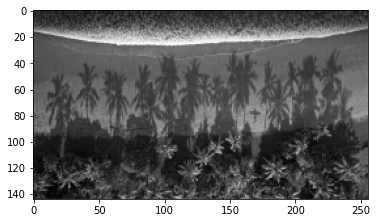

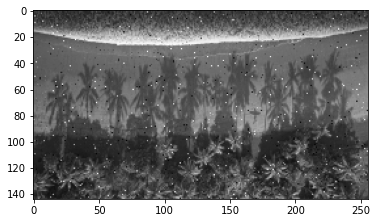

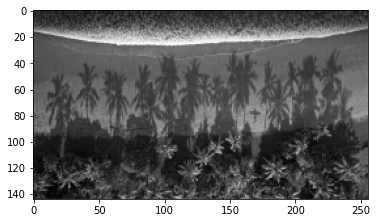

In [6]:
plt.imshow(tree, 'gray')
plt.show()
plt.imshow(tree_noisy, 'gray')
plt.show()
plt.imshow(tree_decoded, 'gray')
plt.show()